<div class="alert alert-block alert-info">
<center> <h1> Text Mining - 2022/2023 </h1> </center> <br>
<center> Group 17 </center>

**Table of Contents** <br>
* [1.Data Import](#dataimport)
    * [1.1.Import Libraries](#importlibraries)
    * [1.2.Import Datasets](#importdatasets)
* [2.Data Exploration](#dataexploration)
    * [2.1. Target data exploration](#targetdataexploration)
    * [2.2. Independent Features data exploration](#independentdataexploration)
        * [2.2.1. Missing Values](#missingvalues)
        * [2.2.2. Word Counts](#wordcounts)
* [3.Data Preprocessing](#datapreprocessing)
* [4.Classification Models](#classificationmodels)
    * [4.1. Define training features - Bag of Words (Bow)](#bow)
* [5.Evaluation](#evaluation)

<hr>
<a class="anchor" id="dataimport">
    
# 1. Data Import
    
</a>

<hr>
<a class="anchor" id="importlibraries">
    
## 1.1. Import Libraries
    
</a>

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Tokenization
import nltk
from nltk.tokenize import word_tokenize

#Punctuation
import string

#Stop Words
from nltk.corpus import stopwords

#Regular Expressions
import re

# Stemming and Lemmatization
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# for displaying progress bars during iterative tasks
from tqdm import tqdm

# Data Partition
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold

# Create BoW - Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# Evaluate
from sklearn.metrics import classification_report

# confusion_matrix
from sklearn.metrics import confusion_matrix

<hr>
<a class="anchor" id="importdatasets">
    
## 1.2. Import Datasets
    
</a>

In [2]:
airbnb_df_train = pd.read_excel('train.xlsx')
airbnb_df_test = pd.read_excel('test.xlsx')

In [3]:
airbnb_df_train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


Set column 'index' as the index, in both train and test datasets

In [4]:
airbnb_df_train = airbnb_df_train.set_index('index')
airbnb_df_train.head()

,description,host_about,unlisted
index,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [5]:
airbnb_df_test = airbnb_df_test.set_index('index')
airbnb_df_test.head()

,description,host_about
index,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
4,Charming Apartment Close to the Bay of Cascais...,:)
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


<hr>
<a class="anchor" id="dataexploration">
    
# 2. Data Exploration
    
</a>

<hr>
<a class="anchor" id="targetdataexploration">
    
## 2.1. Target data exploration
    
</a>

Check the unique values

In [6]:
(airbnb_df_train['unlisted']).unique()

array([0, 1], dtype=int64)

Some statistics about target values

In [7]:
(airbnb_df_train['unlisted']).describe()

count    12496.000000
mean         0.277129
std          0.447598
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: unlisted, dtype: float64

But is is better to visualize it

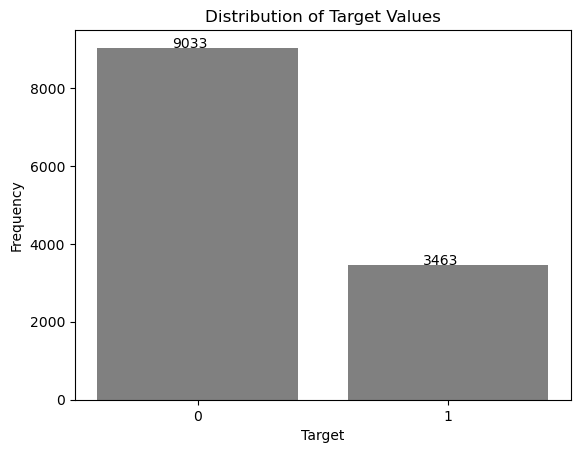

In [179]:
# Calculate the frequency of each rating
counts = airbnb_df_train['unlisted'].value_counts()

# Create a bar chart of the ratings
plt.bar(counts.index, counts.values, color = 'grey')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target Values')
plt.xticks(range(0,2))

# Add the value of each bar to the plot
for i, v in enumerate(counts.values):
    plt.text(counts.index[i] - 0.1, v + 0.1, str(v))

plt.show()

In [180]:
airbnb_df_train['unlisted'].value_counts(normalize = True)

0    0.722871
1    0.277129
Name: unlisted, dtype: float64

<div class="alert alert-block alert-danger">  
Our labels are not balanced
</div>

<hr>
<a class="anchor" id="independentdataexploration">
    
## 2.2. Independent Features data exploration
    
</a>

<hr>
<a class="anchor" id="missingvalues">
    
### 2.2.1. Missing Values
    
</a>

In [9]:
airbnb_df_train['description'].isna().sum()

0

In [10]:
airbnb_df_train['host_about'].isna().sum()

0

<div class="alert alert-block alert-success">
    There is no missing values in the independent features

<hr>
<a class="anchor" id="wordcounts">
    
### 2.2.1. Word Counts
    
</a>

We will split our texts into tokens and count how many tokens exist in each document.

**Description**

In [48]:
airbnb_df_train['word_count_description']  = airbnb_df_train['description'].apply(lambda x: len(str(x).split(" ")))
airbnb_df_train[['description','word_count_description']].head()

,description,word_count_description
index,,
1,"This is a shared mixed room in our hostel, wit...",127
2,"O meu espaço fica perto de Parque Eduardo VII,...",23
3,Trafaria’s House is a cozy and familiar villa ...,170
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",47
5,Joli appartement en bordure de mer.<br /> 2 m...,101


Descriptive Statistics of word count

In [49]:
airbnb_df_train.word_count_description.describe()

count    12496.000000
mean       132.663572
std         48.494104
min          3.000000
25%         99.000000
50%        157.000000
75%        167.000000
max        210.000000
Name: word_count_description, dtype: float64

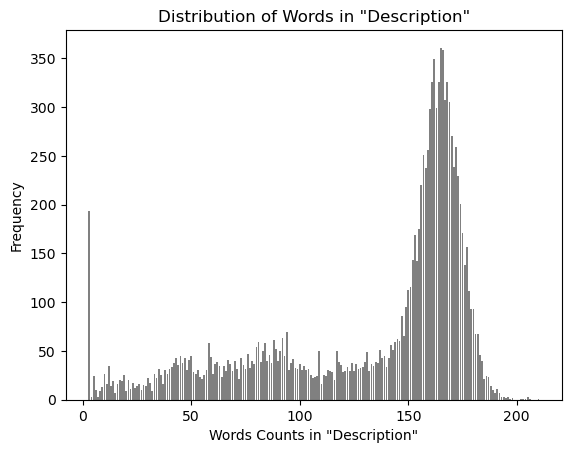

In [50]:
# Calculate the frequency of each rating
counts_desc = airbnb_df_train['word_count_description'].value_counts()

# Create a bar chart of the ratings
plt.bar(counts_desc.index, counts_desc.values, color = 'grey')
plt.xlabel('Words Counts in "Description"')
plt.ylabel('Frequency')
plt.title('Distribution of Words in "Description"')

plt.show()

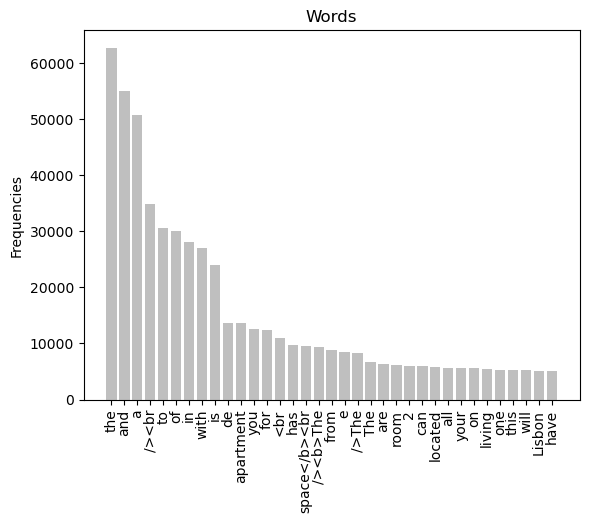

In [51]:
# create a list with all words in airbnb_df_train['description']
all_words_desc = ' '.join(airbnb_df_train['description']).split()
# The frequency of each word
freq_desc = pd.Series(all_words_desc).value_counts()

# A bar plot with the top 35 words, dor description column
x_labels = freq_desc.index[0:35]
values = freq_desc[:35]
plt.bar(x_labels, values, align='center', alpha=0.5, color = 'grey')
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()


**host_about**

In [52]:
airbnb_df_train['word_count_host_about']  = airbnb_df_train['host_about'].apply(lambda x: len(str(x).split(" ")))
airbnb_df_train[['host_about','word_count_host_about']].head()

,host_about,word_count_host_about
index,,
1,Alojamento Local Registro: 20835/AL,4
2,"I am friendly host, and I will try to always b...",24
3,"I am a social person liking to communicate, re...",45
4,Hello!_x000D_\nI m Portuguese and i love to me...,31
5,Nous sommes une famille avec deux enfants de 1...,37


Descriptive Statistics of word count

In [53]:
airbnb_df_train.word_count_host_about.describe()

count    12496.000000
mean        73.031050
std         77.132867
min          1.000000
25%         26.000000
50%         55.000000
75%        102.000000
max       1387.000000
Name: word_count_host_about, dtype: float64

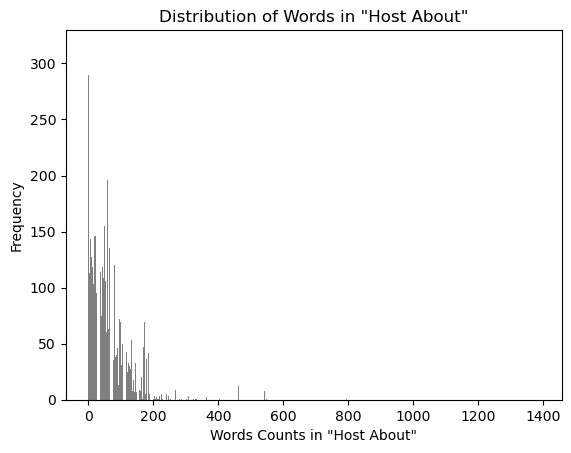

In [54]:
# Calculate the frequency of each rating
counts_host = airbnb_df_train['word_count_host_about'].value_counts()

# Create a bar chart of the ratings
plt.bar(counts_host.index, counts_host.values, color = 'grey')
plt.xlabel('Words Counts in "Host About"')
plt.ylabel('Frequency')
plt.title('Distribution of Words in "Host About"')

plt.show()

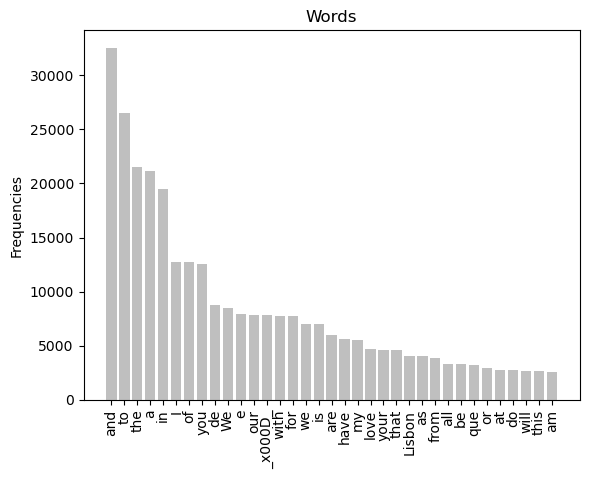

In [55]:
# create a list with all words in airbnb_df_train['description']
all_words_host = ' '.join(airbnb_df_train['host_about']).split()
# The frequency of each word
freq_host = pd.Series(all_words_host).value_counts()

# A bar plot with the top 35 words, for 'host_about' column
x_labels = freq_host.index[0:35]
values = freq_host[:35]
plt.bar(x_labels, values, align='center', alpha=0.5, color = 'grey')
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

<hr>
<a class="anchor" id="datapreprocessing">
    
# 3. Data Preprocessing
    
</a>

Defining a function to do the data Preprocessing for each of column

In [56]:
def clean(text_list, lemmatize, stemmer):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        
        #LOWERCASE TEXT
        text = text.lower()
                
        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", text )
        # [^&] - Returns a match for any character EXCEPT &.
        # a-zA-Z - Returns a match for any character alphabetically between a and z, lower case or upper case.
        
        #REMOVE STOPWORDS
        stop_english = set(stopwords.words('english'))
        stop_portuguese = set(stopwords.words('portuguese'))
        text = " ".join([word for word in text.split() if word not in stop_english])
        text = " ".join([word for word in text.split() if word not in stop_portuguese])
        
        #REMOVE ALL 'br' and 'b'
        remove = ['br', 'b', 'x']
        text = " ".join([word for word in text.split() if word not in remove])
        
        #Lemmatize
        lemma = WordNetLemmatizer()
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        #Stemming
        stemmer_english = SnowballStemmer('english')
        stemmer_portuguese = SnowballStemmer('portuguese')
        if stemmer:
            text = " ".join(stemmer_english.stem(word) for word in text.split())
            text = " ".join(stemmer_portuguese.stem(word) for word in text.split())
                      
        updates.append(text)
        
    return updates

**Description**

In [57]:
updates_desc = clean(airbnb_df_train['description'], lemmatize = True, stemmer = True)

100%|██████████| 12496/12496 [00:38<00:00, 323.27it/s]


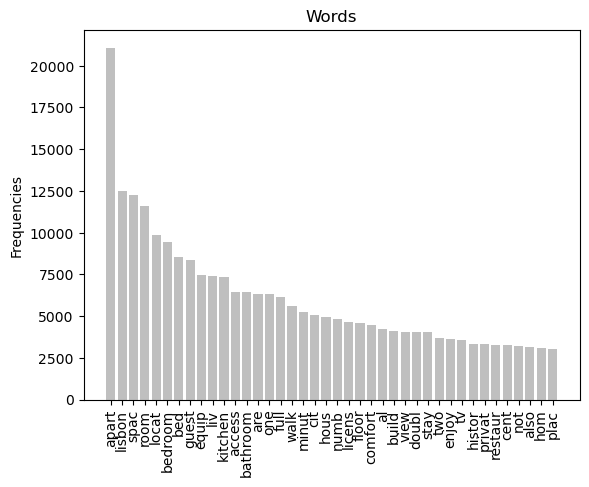

In [58]:
# create a list with all words in airbnb_df_train['description']
all_words_desc_proc = ' '.join(updates_desc).split()

# The frequency of each word
freq_desc_proc = pd.Series(all_words_desc_proc).value_counts()

# A bar plot with the top 35 words, for 'host_about' column
x_labels = freq_desc_proc.index[0:40]
values = freq_desc_proc[:40]
plt.bar(x_labels, values, align='center', alpha=0.5, color = 'grey')
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

In [59]:
unique_words_desc_proc = sorted(set(all_words_desc_proc))
len(unique_words_desc_proc)

14733

In [60]:
len(all_words_desc)

1648726

<div class="alert alert-block alert-success">
Before the data preprocessing we had 1.648.726 unique words, after we reduce to 14.734 words 

The list of unique words in Description

In [61]:
print(unique_words_desc_proc)

['aanwezig', 'ab', 'aba', 'abad', 'abaiss', 'abaix', 'abaj', 'aban', 'abandon', 'abarrac', 'abast', 'abbaubar', 'abelh', 'abelheir', 'aben', 'abend', 'abenteur', 'aber', 'abert', 'abertur', 'abgehend', 'abgeht', 'abgeschliffen', 'abgeschlossen', 'abh', 'abholung', 'abid', 'abient', 'abil', 'abklappern', 'abl', 'abli', 'abnb', 'aboard', 'abod', 'abond', 'abonn', 'abordag', 'abou', 'abound', 'abr', 'abra', 'abrac', 'abrangent', 'abre', 'abrig', 'abril', 'abrir', 'abroad', 'abrunheir', 'abschalten', 'abseit', 'absenc', 'absens', 'absolu', 'absolut', 'absolutament', 'absorb', 'absorv', 'abster', 'abstract', 'absurd', 'abund', 'abus', 'abut', 'ac', 'aca', 'acab', 'acabamentosapart', 'acac', 'acad', 'academ', 'acapulc', 'acas', 'acc', 'acced', 'acceess', 'accent', 'accentu', 'accep', 'accept', 'acces', 'accesor', 'access', 'accessib', 'accessibilit', 'accessibl', 'accessor', 'accesst', 'accid', 'acclaim', 'acco', 'accom', 'accommod', 'accommodat', 'accomod', 'accompan', 'accomplish', 'accord

<div class="alert alert-block alert-danger"> 
We still have many words with the same meaning, because we have different laguase like linbon:
'lisbo', 'lisboabo', 'lisboad', 'lisboaet', 'lisboan', 'lisboet', 'lisbom', 'lisbon', 'lisbonaccommod', 'lisboncmanag', 
'lisbonens', 'lisbonian', 'lisbonit', 'lisbonluxhom', 'lisbonn', 'lisbonnn'

**host_about**

In [63]:
updates_host = clean(airbnb_df_train['host_about'], lemmatize = True, stemmer = True)

100%|██████████| 12496/12496 [00:24<00:00, 520.45it/s]


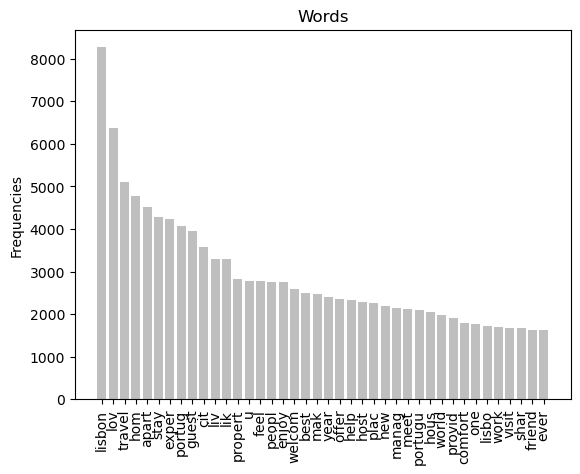

In [64]:
# create a list with all words in airbnb_df_train['description']
all_words_host_proc = ' '.join(updates_host).split()

# The frequency of each word
freq_host_proc = pd.Series(all_words_host_proc).value_counts()

# A bar plot with the top 35 words, for 'host_about' column
x_labels = freq_host_proc.index[0:40]
values = freq_host_proc[:40]
plt.bar(x_labels, values, align='center', alpha=0.5, color = 'grey')
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

In [65]:
unique_words_host = sorted(set(all_words_host_proc))
len(unique_words_host)

10912

In [66]:
len(all_words_host)

931865

<div class="alert alert-block alert-success">
For hosts_about, before the data preprocessing we had 931.865 unique words, after we reduce to 10.912 words

In [80]:
airbnb_df_train

,description,host_about,unlisted
index,,,
1,espa fic pert parqu eduard vii saldanh estefan...,friend host tri alway around need anyth though...,0
2,traf hous coz famili vill facil need relax com...,social person lik communic read travel lik cin...,1
3,apart charmos chi larg carm travess trindad es...,hell portugu lov meet peopl around word mayb o...,1
4,jol appart en bordur mer min pie la plag vue m...,nous somm une famill avec deux enfant et an no...,0
5,import respons covid propert extend clean disi...,hi hom compan develop activ tourism provid gue...,0
...,...,...,...
12492,beaut locat heart lisbon histor cent near one ...,found travel enthusiast lik bnbird want connec...,0
12493,enjoy breakfast sleek kitchen freestand knott ...,portug lov danc travel pleasur welcom amaz lisbon,0
12494,terr eir cas camp rod rvor frut conv descans b...,famil gostam viaj receb amig pra camp sol sal,0


Update our dataframe with the new text preprocessed

In [78]:
airbnb_df_train = airbnb_df_train.drop(['word_count_description'], axis=1)
airbnb_df_train = airbnb_df_train.drop(['word_count_host_about'], axis=1)
airbnb_df_train.update(pd.DataFrame({"description": updates_desc}))
airbnb_df_train.update(pd.DataFrame({"host_about": updates_host}))
airbnb_df_train

,description,host_about,unlisted
index,,,
1,espa fic pert parqu eduard vii saldanh estefan...,friend host tri alway around need anyth though...,0
2,traf hous coz famili vill facil need relax com...,social person lik communic read travel lik cin...,1
3,apart charmos chi larg carm travess trindad es...,hell portugu lov meet peopl around word mayb o...,1
4,jol appart en bordur mer min pie la plag vue m...,nous somm une famill avec deux enfant et an no...,0
5,import respons covid propert extend clean disi...,hi hom compan develop activ tourism provid gue...,0
...,...,...,...
12492,beaut locat heart lisbon histor cent near one ...,found travel enthusiast lik bnbird want connec...,0
12493,enjoy breakfast sleek kitchen freestand knott ...,portug lov danc travel pleasur welcom amaz lisbon,0
12494,terr eir cas camp rod rvor frut conv descans b...,famil gostam viaj receb amig pra camp sol sal,0


<hr>
<a class="anchor" id="classificationmodels">
    
# 4. Classification Models
    
</a>

<hr>
<a class="anchor" id="bow">
    
## 4.1. Define training features - Bag of Words (Bow)
    
</a>

Split the dataset into train and validation and maintain the original format

In [200]:
train = airbnb_df_train.sample(frac=0.8, random_state=1)
validation = airbnb_df_train.drop(train.index)

Define the independent variable

In [211]:
x_train = train['description']
x_train

index
9376     sunn quiet apart locat beaut typic small squ n...
9535     flat locat sant district lisbon plent sights p...
814      renew apart perfect guest day explor lisbon eq...
11246    lov brand new renovet apart locat oeir apart t...
1437     new doubl bedroom shar toilet bd wc build elev...
                               ...                        
9163     luxur loft full natur light strik decor detail...
7187     coz pleasant apart read welcom peopl world cen...
7821     cas espec mei natur sob rvor estrel interior c...
3008     welcom hous apart locat are sant catarin centr...
7226     apart bedroomsal doubl bed closet desk kitchen...
Name: description, Length: 9997, dtype: object

In [212]:
x_val = validation['description']
x_val

index
1        espa fic pert parqu eduard vii saldanh estefan...
3        apart charmos chi larg carm travess trindad es...
16       set stun seasid locat luxur propert tuck villa...
19       great locat view mourish castl minut walk rail...
21       locat heart lisbon histor part cit enjoy coz b...
                               ...                        
12471    vill ericeir bedroom capac peopl vill view wat...
12477    bed breakfast locat within terr lus domain qui...
12480    spacious modern hous locat near magoit beach s...
12490    suit one room hous total room locat km away fa...
12492    beaut locat heart lisbon histor cent near one ...
Name: description, Length: 2499, dtype: object

Define labels

In [214]:
y_train = np.array(train['unlisted'])
y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [218]:
len(y_train)

9997

In [220]:
# get the unique values and their counts
unique_values, counts = np.unique(y_train, return_counts=True)

# calculate the percentage of each unique value
total = len(y_train)
percentages = counts / total * 100

# print the unique values, their counts, and their percentages
for i in range(len(unique_values)):
    print(f"{unique_values[i]} occurs {counts[i]} times ({percentages[i]:.2f}%)")

0 occurs 7213 times (72.15%)
1 occurs 2784 times (27.85%)


In [205]:
y_val = np.array(validation['unlisted'])
y_val

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [221]:
# get the unique values and their counts
unique_values, counts = np.unique(y_val, return_counts=True)

# calculate the percentage of each unique value
total = len(y_val)
percentages = counts / total * 100

# print the unique values, their counts, and their percentages
for i in range(len(unique_values)):
    print(f"{unique_values[i]} occurs {counts[i]} times ({percentages[i]:.2f}%)")

0 occurs 1820 times (72.83%)
1 occurs 679 times (27.17%)


<div class="alert alert-block alert-danger"> 
The train and validation are both inbalanced, but with the same proportion

Create BoW from train corpus

In [213]:
bow = CountVectorizer()
X_train = bow.fit_transform(x_train)
X_train

<9997x13638 sparse matrix of type '<class 'numpy.int64'>'
	with 590461 stored elements in Compressed Sparse Row format>

KNeighborsClassifier

In [216]:
modelknn = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')

In [222]:
modelknn.fit(X_train,y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

Predict - apply KNN

In [224]:
X_val = bow.transform(x_val)

In [225]:
y_pred = modelknn.predict(X_val)

<hr>
<a class="anchor" id="evaluation">
    
# 5. Evaluation
    
</a>

In [226]:
labels = {"Unlisted":0, "Listed":1}
print(classification_report(y_pred, y_val, target_names = labels.keys()))

              precision    recall  f1-score   support

    Unlisted       0.89      0.72      0.80      2241
      Listed       0.09      0.24      0.13       258

    accuracy                           0.67      2499
   macro avg       0.49      0.48      0.46      2499
weighted avg       0.81      0.67      0.73      2499



In [229]:
confusion_matrix(y_pred, y_val)

array([[1623,  618],
       [ 197,   61]], dtype=int64)

C:\Users\katxi\AppData\Local\Temp\ipykernel_25156\2454256869.py:39: UserWarning: Attempting to set identical bottom == top == 1.5 results in singular transformations; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


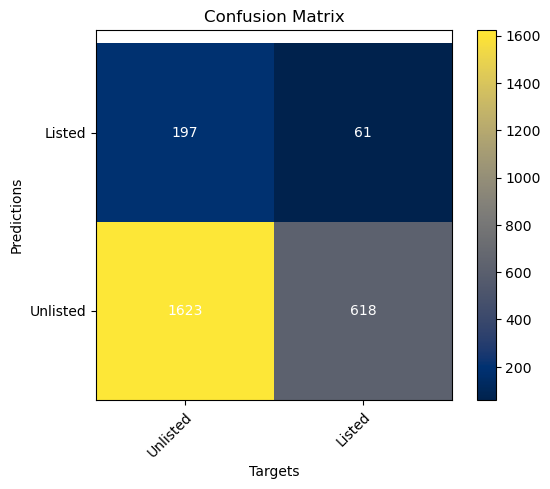

In [231]:
def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

plot_cm(confusion_matrix(y_pred, y_val), labels.keys())